In [ ]:
import pandas as pd
from google.colab import files

# Access the uploaded file
file_path = 'healthcare_dataset.csv'

try:
    df = pd.read_csv(file_path)
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please ensure the file is uploaded to your Colab environment.")


            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("healthcare_dataset.csv")

In [ ]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
data.shape


(55500, 15)

In [ ]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [ ]:
data_original = data.copy()


In [ ]:
print(data.isnull().sum())


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [ ]:

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Clean column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert date columns and create 'days_since_admission'
data['date_of_admission'] = pd.to_datetime(data['date_of_admission'])
data['discharge_date'] = pd.to_datetime(data['discharge_date'])
data['days_since_admission'] = (data['discharge_date'] - data['date_of_admission']).dt.days
data.drop(columns=['date_of_admission', 'discharge_date'], inplace=True)

# Apply Label Encoding to categorical columns
categorical_columns = ['gender', 'blood_type', 'medical_condition', 'doctor', 'hospital',
                       'insurance_provider', 'admission_type', 'medication', 'test_results']
for col in categorical_columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# Scale numerical features
numerical_features = ['age', 'billing_amount', 'room_number', 'days_since_admission']
data[numerical_features] = StandardScaler().fit_transform(data[numerical_features])

# Preview processed data
data.head()


,name,age,gender,blood_type,medical_condition,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,medication,test_results,days_since_admission
0,Bobby JacksOn,-1.098824,1,5,2,26612,29933,1,-0.470261,0.233120,2,3,2,-1.560018
1,LesLie TErRy,0.533639,1,0,5,33648,16012,3,0.570250,-0.313556,1,1,1,-1.098099
2,DaNnY sMitH,1.247842,0,1,5,37828,5473,0,0.169990,-0.834199,1,0,2,-0.058780
3,andrEw waTtS,-1.200853,0,6,3,22511,12317,3,0.870465,1.291761,0,1,0,1.673417
4,adrIENNE bEll,-0.435636,0,2,2,21259,33598,0,-0.795211,1.361180,2,4,0,0.518619


In [ ]:
# Verify and drop non-numeric columns
data = data.select_dtypes(include=['number'])  # Keep only numeric columns


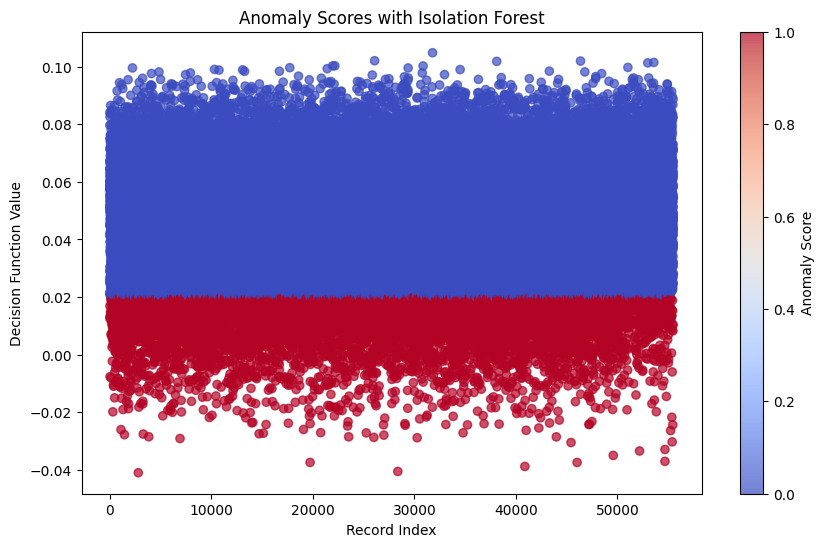

Best Parameters: {'n_estimators': 550, 'max_samples': 0.9, 'contamination': 0.018}
Precision: 0.07767734027884174
Accuracy: 0.8307747747747748
Confusion Matrix:
 [[45601  6020]
 [ 3372   507]]


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Define feature matrix
X = data.values

# Step 2: Define true labels for evaluation (replace with actual labels if available)
true_labels = np.random.choice([0, 1], size=X.shape[0], p=[0.93, 0.07])

# Step 3: Manual hyperparameter tuning
best_precision = 0
best_params = None

# grid of hyperparameters
n_estimators_list = [450,550]
max_samples_list = [0.85,0.9]
contamination_list = [0.018,0.025,0.03]

for n_estimators in n_estimators_list:
    for max_samples in max_samples_list:
        for contamination in contamination_list:
            # Initialize and train the model
            iso_forest = IsolationForest(
                n_estimators=n_estimators,
                max_samples=max_samples,
                contamination=contamination,
                random_state=42
            )
            iso_forest.fit(X)

            predictions = iso_forest.predict(X)
            predictions = np.where(predictions == -1, 1, 0)

            precision = precision_score(true_labels, predictions)

            if precision > best_precision:
                best_precision = precision
                best_params = {
                    'n_estimators': n_estimators,
                    'max_samples': max_samples,
                    'contamination': contamination
                }

# Step 4: Train final model with best parameters
final_model = IsolationForest(**best_params, random_state=42)
final_model.fit(X)

# Step 5: Adjust decision function threshold
threshold = 0.02
decision_function_values = final_model.decision_function(X)
predictions = np.where(decision_function_values < threshold, 1, 0)

data['anomaly'] = predictions

# Step 6: Visualize anomalies
plt.figure(figsize=(10, 6))
plt.scatter(data.index, decision_function_values, c=data['anomaly'], cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Anomaly Score')
plt.xlabel('Record Index')
plt.ylabel('Decision Function Value')
plt.title('Anomaly Scores with Isolation Forest')
plt.show()

# Step 7: Evaluation of final model
precision = precision_score(true_labels, data['anomaly'])
accuracy = accuracy_score(true_labels, data['anomaly'])
cm = confusion_matrix(true_labels, data['anomaly'])

print("Best Parameters:", best_params)
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Cross-Validation Accuracy Scores: [0.06720721 0.06540541 0.06675676 0.06837838 0.06945946]
Mean Cross-Validation Accuracy: 0.06744144144144143


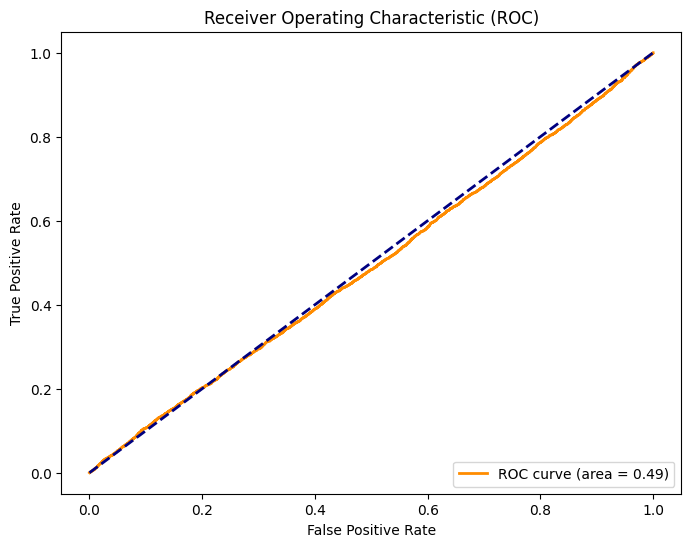

AUC-ROC: 0.4914474764734674


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

# Cross-validation to evaluate the stability of the model
cross_val_scores = cross_val_score(final_model, X, true_labels, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cross_val_scores)}")

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, final_model.decision_function(X))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print(f"AUC-ROC: {roc_auc}")


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

# Step 1: Train the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.03, kernel="rbf", gamma='scale')
one_class_svm.fit(X)

# Step 2: Make predictions
svm_predictions = one_class_svm.predict(X)
svm_predictions = np.where(svm_predictions == -1, 1, 0)

# Step 3: Evaluate the performance
precision = precision_score(true_labels, svm_predictions)
accuracy = accuracy_score(true_labels, svm_predictions)
cm = confusion_matrix(true_labels, svm_predictions)

print("Precision:", precision)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Precision: 0.07687687687687687
Accuracy: 0.9047207207207207
Confusion Matrix:
 [[50084  1537]
 [ 3751   128]]


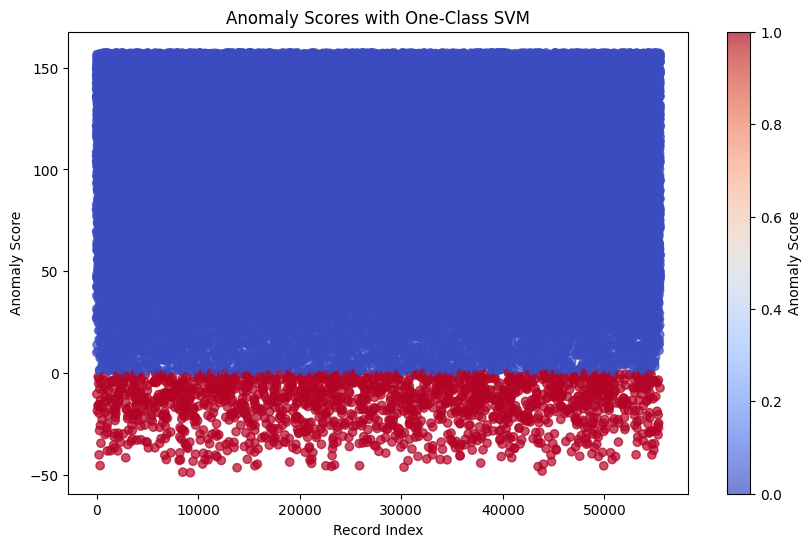

In [ ]:
# Step 1: Visualize Anomaly Scores
anomaly_scores = one_class_svm.decision_function(X)

# Step 2: Plot Anomaly Scores with Predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(anomaly_scores)), anomaly_scores, c=svm_predictions, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Anomaly Score')
plt.xlabel('Record Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores with One-Class SVM')
plt.show()


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

# Step 1: Initialize and fit LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05, novelty=True)
lof.fit(X)
# Step 2: Predict anomalies
lof_predictions = lof.predict(X)
lof_predictions = np.where(lof_predictions == -1, 1, 0)

# Step 3: Evaluate the model
precision = precision_score(true_labels, lof_predictions)
accuracy = accuracy_score(true_labels, lof_predictions)
cm = confusion_matrix(true_labels, lof_predictions)

print("LOF Precision:", precision)
print("LOF Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


LOF Precision: 0.06648326455754242
LOF Accuracy: 0.896036036036036
Confusion Matrix:
 [[49585  2036]
 [ 3734   145]]


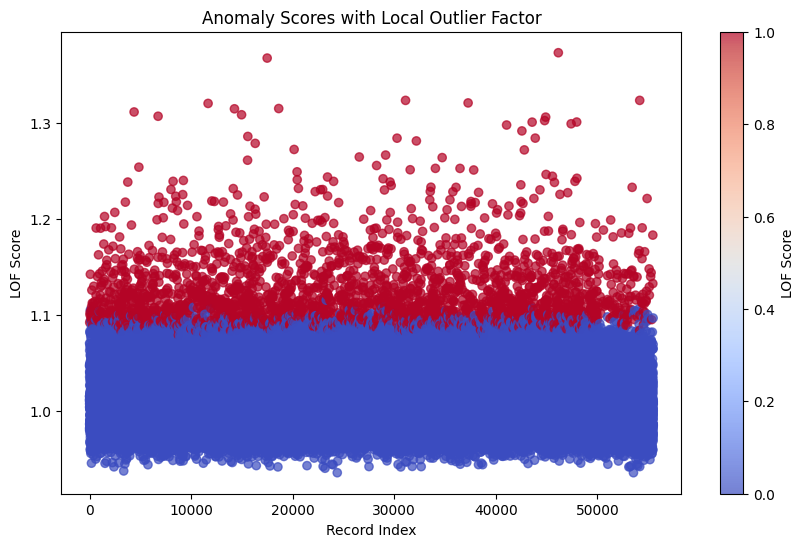

In [ ]:
lof_scores = -lof.negative_outlier_factor_
plt.figure(figsize=(10, 6))
plt.scatter(range(len(lof_scores)), lof_scores, c=lof_predictions, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='LOF Score')
plt.xlabel('Record Index')
plt.ylabel('LOF Score')
plt.title('Anomaly Scores with Local Outlier Factor')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9260 - val_loss: 0.7210
Epoch 2/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7094 - val_loss: 0.6711
Epoch 3/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6686 - val_loss: 0.6532
Epoch 4/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6493 - val_loss: 0.6409
Epoch 5/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6384 - val_loss: 0.6289
Epoch 6/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6310 - val_loss: 0.6195
Epoch 7/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6208 - val_loss: 0.6128
Epoch 8/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6147 - val_loss: 0.6092
Epoch 9/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6099 - val_loss: 0.6018
Epoch 10/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6052 - val_loss: 0.5983
Epoch 11/50
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5997 - val_loss: 0.5936
Epoch 12/50
1388/1388 ━━━━━━━━

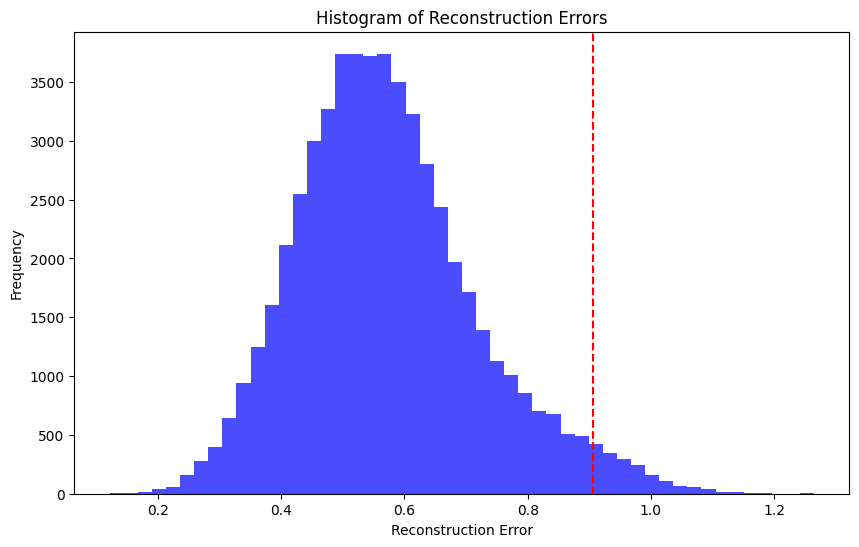

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix

# Assuming data is preprocessed and X is your feature matrix
X = data.values  # Use your preprocessed data here

# Step 1: Scale the data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Define the Autoencoder model
input_dim = X_scaled.shape[1]  # Number of features in the dataset

autoencoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(input_dim,)),  # Input layer with correct shape
    tf.keras.layers.Dense(32, activation='relu'),          # Encoding layer 1
    tf.keras.layers.Dense(16, activation='relu'),          # Encoding layer 2
    tf.keras.layers.Dense(8, activation='relu'),           # Bottleneck layer (lowest dimension)
    tf.keras.layers.Dense(16, activation='relu'),          # Decoding layer 1
    tf.keras.layers.Dense(32, activation='relu'),          # Decoding layer 2
    tf.keras.layers.Dense(input_dim, activation='sigmoid') # Output layer (reconstructed data)
])

# Step 3: Compile the model
autoencoder.compile(optimizer='adam', loss='mse')  # Mean Squared Error for reconstruction loss

# Step 4: Train the Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2)

# Step 5: Predict the reconstructed data
reconstructed = autoencoder.predict(X_scaled)

# Step 6: Calculate reconstruction errors
reconstruction_errors = np.mean(np.abs(X_scaled - reconstructed), axis=1)

# Step 7: Set a threshold for anomalies (you can tune this value)
threshold = np.percentile(reconstruction_errors, 97)  # Anomalies above the 95th percentile

# Step 8: Predict anomalies
predictions = (reconstruction_errors > threshold).astype(int)

# Step 9: Evaluate performance
# Assuming you have true labels (replace with actual labels if available)
true_labels = np.random.choice([0, 1], size=X.shape[0], p=[0.95, 0.05])

precision = precision_score(true_labels, predictions)
accuracy = accuracy_score(true_labels, predictions)
cm = confusion_matrix(true_labels, predictions)

# Step 10: Print results
print("Precision:", precision)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

# Step 11: Visualize reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50, color='blue', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors')
plt.show()



In [ ]:
from scipy.stats import mode

# Combine predictions (Example: Isolation Forest, One-Class SVM, LOF)
combined_predictions = np.array([
    data['anomaly'].values,  # Isolation Forest predictions
    svm_predictions,         # One-Class SVM predictions
    lof_predictions           # LOF predictions
])

# Take majority vote
ensemble_predictions = mode(combined_predictions, axis=0).mode.flatten()

# Evaluate Ensemble Model
precision = precision_score(true_labels, ensemble_predictions)
accuracy = accuracy_score(true_labels, ensemble_predictions)
cm = confusion_matrix(true_labels, ensemble_predictions)

print("Ensemble Precision:", precision)
print("Ensemble Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


Ensemble Precision: 0.034141958670260555
Ensemble Accuracy: 0.9303243243243243
Confusion Matrix:
 [[51595  1075]
 [ 2792    38]]
